# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [12]:
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


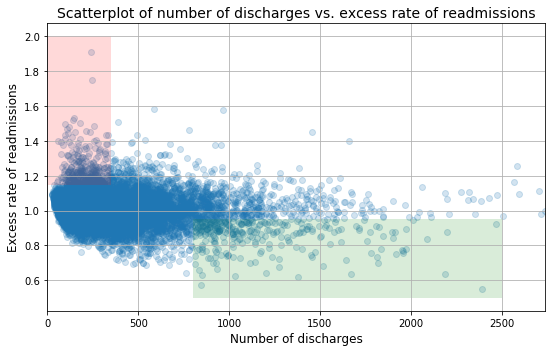

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

A. Initial observations based on the plot above

Overall, rate of readmissions is trending down with increasing number of discharges




--Now there is no numerical evidence to suggest this so lets check their correlation coefficent

In [ ]:
#clean_hospital_read_df['Number of Discharges']

In [6]:
clean_hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

In [7]:
clean_hospital_read_df= clean_hospital_read_df.drop(columns=['Footnote'])

In [8]:
clean_hospital_read_df = clean_hospital_read_df.dropna(axis=0)

In [9]:
clean_hospital_read_df.corr()

,Provider Number,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.008849,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.008849,1.000000,-0.097398,-0.135163,-0.131091,0.791272
Excess Readmission Ratio,-0.012112,-0.097398,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,0.117600,0.361033,0.330527,1.000000


Correlation coefficent of -0.097 shows that there is no correlation as such between the two and hence the initial report is not right

-With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)



-With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

Now once again nothing much can be told by looking at just the graph as there could be possible biases here

B. Statistics




In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

In [10]:
less_than_100 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100)]
# number fo hospitals
print('# Hospitals with < 100 discharges: ', len(less_than_100))
# what is the mean rate
print('Observed mean excess readmission rate: ', less_than_100['Excess Readmission Ratio'].mean())

# what percentage of the hospitals
print('Percent > 1:', ((len(less_than_100[less_than_100['Excess Readmission Ratio'] > 1]) / len(less_than_100)) * 100), '%')

# Hospitals with < 100 discharges:  1188
Observed mean excess readmission rate:  1.0226183501683506
Percent > 1: 63.215488215488215 %


In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.



In [11]:
less_than_1000 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1000)]
# number fo hospitals
print('# Hospitals with < 1000 discharges: ', len(less_than_1000))
# what is the mean rate
print('Observed mean excess readmission rate: ', round(less_than_1000['Excess Readmission Ratio'].mean(), 3))
# what percentage of the hospitals
print('Percent > 1:', ((len(less_than_1000[less_than_1000['Excess Readmission Ratio'] > 1]) / len(less_than_1000)) * 100), '%')

# Hospitals with < 1000 discharges:  463
Observed mean excess readmission rate:  0.978
Percent > 1: 44.49244060475162 %


# Both these claims are statistically true

C. Conclusions




There is a significant correlation between hospital capacity (number of discharges) and readmission rates.





Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

# Yes there is significant correlation between number of discharges and readmission rates.

# Now there is no hospital size column which says the particular hospital is big or small etc..

Lets conduct our own hypothesis test to find things out

In [15]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 11 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int32
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 1.0+ MB


## HO: No significant difference between mean excess readmissions of hospitals with lesser then or equal to 100 discharges and greater than 1000 discharges

## Ha: There is significant difference between the means of both

In [16]:
small_hospitals = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<=100]

In [17]:
big_hospitals = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>1000]

In [ ]:
small_mean_excess = small_hospitals['Excess Readmission Ratio']

In [19]:
big_mean_excess = big_hospitals['Excess Readmission Ratio']

In [24]:
#Conducting two sample t-test since there is no population standard deviation

In [ ]:
from scipy.stats import ttest_ind
t_value,p_value= ttest_ind(small_mean_excess,big_mean_excess)

print('t-statistic:',t_value)
print('p value =',p_value)

In [34]:
small_hospitals.shape

(1223, 11)

In [35]:
big_hospitals.shape

(463, 11)

# Since P-value is lesser then significane level of 0.01 we can reject the null hypothesis that there are no significant differences

Discuss statistical significance and practical significance

## Now although our hypothesis tests tells us that there is a difference between the means practically we cant infer anything form this since the sample sizes are very large and test methodology might also not be right.So despite our tests showing statistical dissimilarity between the two samples practically nothing can be infered

What are the advantages and disadvantages of using this plot to convey information?



Construct another plot that conveys the same information in a more direct manner.

### Advatages:
--- Shaded regions make it visually striking


## Disadvantages:
--- No Correlation coefficient between the variables


## better plot

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


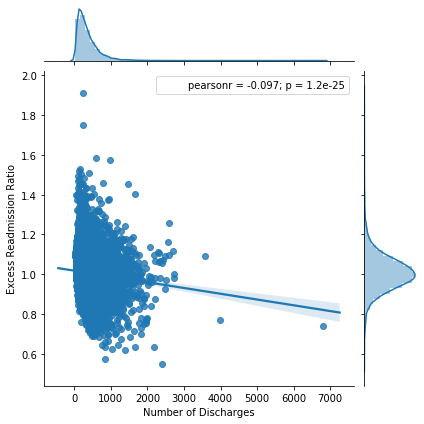

In [40]:
j = sns.jointplot('Number of Discharges','Excess Readmission Ratio',data=clean_hospital_read_df,kind='reg')
j.annotate(stats.pearsonr)
plt.show()